## Final Testing

### Cody Bullock

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Final dataset import and transformation

The .csv final dataset was imported into the program as a Pandas dataframe, and the labels, "Wins", and features were extracted and transformed into numpy arrays.  

In [6]:
df = pd.read_csv("Data/Final files/2024Finalv3.csv")
display(df)

target = df["Wins"]
data = df.iloc[:,1:]
target = target.to_numpy()
data = data.to_numpy()

,Wins,Seed,PPG,AST,AST/TO Ratio,BKPG,FG%,OPP FG,OPP FGA,OPP FG%,...,Opp 3FG,Opp 3FG Pct,Opp TO,TO,Turnover Ratio,W/L Pct,ORebs,ORPG,DRebs,DRPG
0,4,4,90.8,515,1.34,4.2,47.7,884,2008,44.0,...,235,31.9,374,383,-0.3,65.6,407,12.72,860,26.88
1,0,3,89.4,562,1.65,6.3,49.7,891,2075,42.9,...,270,32.6,384,341,1.3,71.9,321,10.03,881,27.53
2,2,2,87.9,615,1.55,3.5,48.9,872,2062,42.3,...,263,33.4,446,397,1.5,75.8,437,13.24,970,29.39
3,0,13,86.0,596,1.33,3.8,49.3,862,2010,42.9,...,272,33.8,565,448,3.4,85.3,357,10.50,860,25.29
4,0,7,85.1,524,1.27,5.3,45.6,983,2257,43.6,...,238,32.2,377,412,-1.0,68.6,517,14.77,977,27.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,0,14,71.5,515,1.43,3.5,47.0,801,1963,40.8,...,233,29.8,381,360,0.6,73.5,277,8.15,944,27.76
60,1,11,70.8,470,1.14,4.3,43.7,805,1921,41.9,...,229,31.7,466,413,1.5,68.6,370,10.57,861,24.60
61,0,16,67.6,332,0.73,3.1,44.0,833,1925,43.3,...,220,33.9,439,456,-0.5,58.8,328,9.65,766,22.53
62,0,15,65.3,347,0.85,4.2,39.7,680,1643,41.4,...,182,32.2,434,408,0.8,59.4,403,12.59,737,23.03


### Loading in previously saved models

Previously saved models were loaded in for final testing

In [8]:
from joblib import load

BalancedAccTree = load("BalancedAccTree.joblib")
F1WeightedTree = load("F1WeightedTree.joblib")

RFBalancedAcc = load("RFBalancedAcc.joblib")
RFF1Weighted = load("RFF1Weighted.joblib")

### Final testing of models optimized for balanced accuracy

The decision tree and random forest whose hyperparameters were optimized for balanced accuracy were scored using the test dataset (2024 March Madness results).  

The accuracies were printed and the confusion matrices were displayed.

-----Accuracy of models optimized for balanced accuracy-----
Decision Tree accuracy: 0.34
Random Forest accuracy: 0.48


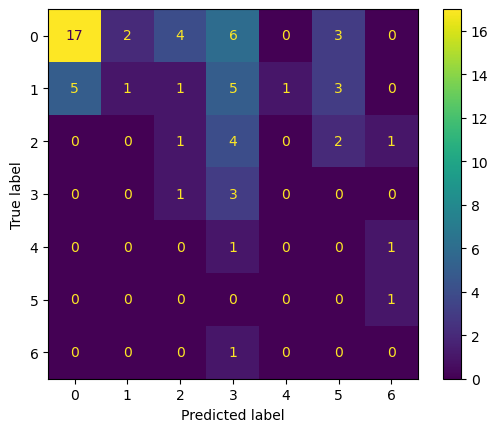

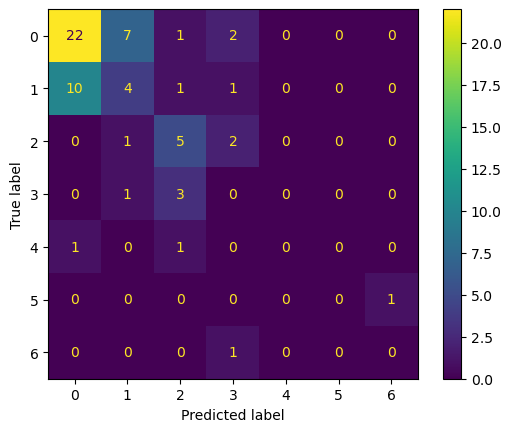

In [20]:
print("-----Accuracy of models optimized for balanced accuracy-----")
print(f"Decision Tree accuracy: {BalancedAccTree.score(data,target):.2f}")
print(f"Random Forest accuracy: {RFBalancedAcc.score(data,target):.2f}")

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

dt_cm = confusion_matrix(target,BalancedAccTree.predict(data))
rf_cm = confusion_matrix(target,RFBalancedAcc.predict(data))
disp1 = ConfusionMatrixDisplay(dt_cm)
disp2 = ConfusionMatrixDisplay(rf_cm)
disp1.plot()
disp2.plot()
plt.show()

### Final testing of models optimized for f1 score

The decision tree and random forest whose hyperparameters were optimized for f1 score were scored using the test dataset and (2024 March Madness results).  

The accuracies were printed and the confusion matrices displayed.

-----Accuracy of models optimized for f1 score-----
Decision Tree accuracy: 0.33
Random Forest accuracy: 0.44


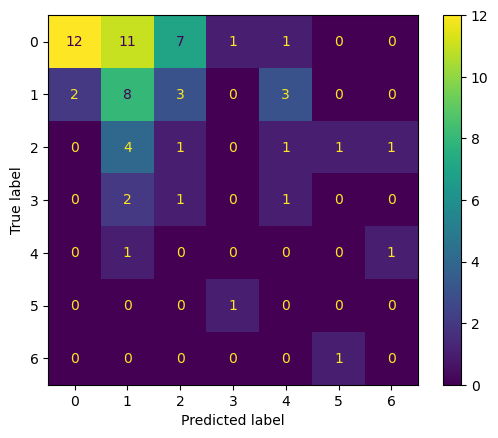

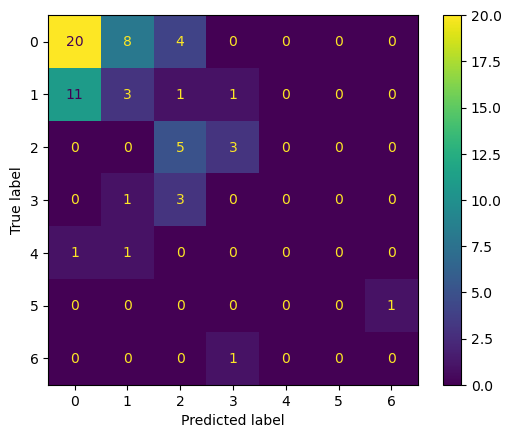

In [21]:
print("-----Accuracy of models optimized for f1 score-----")
print(f"Decision Tree accuracy: {F1WeightedTree.score(data,target):.2f}")
print(f"Random Forest accuracy: {RFF1Weighted.score(data,target):.2f}")

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

dt_cm = confusion_matrix(target,F1WeightedTree.predict(data))
rf_cm = confusion_matrix(target,RFF1Weighted.predict(data))
disp1 = ConfusionMatrixDisplay(dt_cm)
disp2 = ConfusionMatrixDisplay(rf_cm)
disp1.plot()
disp2.plot()
plt.show()